We repeat the earlier process to blur the original image $X$ to get $Z$. 

In [1]:
using Images,TestImages
img = testimage("mandrill");
m,n = size(img)

X = @. Float64(Gray(img))

using SparseArrays
B = spdiagm(0=>fill(0.5,m),1=>fill(0.25,m-1),-1=>fill(0.25,m-1));
C = spdiagm(0=>fill(0.5,n),1=>fill(0.25,n-1),-1=>fill(0.25,n-1));

blur = X -> B^12 * X * C^12;
Z = blur(X);

Now we imagine that $X$ is unknown and that the blurred $Z$ is given. We want to invert the blur transformation using the transformation itself. But we have to translate between vectors and images each time. 

In [2]:
using LinearMaps
unvec = z -> reshape(z,m,n)
T = LinearMap(x -> vec(blur(unvec(x))),m*n);

Now we apply `gmres` to the composite blurring transformation `T`.

In [3]:
using IterativeSolvers

y = gmres(T,vec(Z),maxiter=50,tol=1e-5);
Y = unvec(@.max(0,min(1,y)));

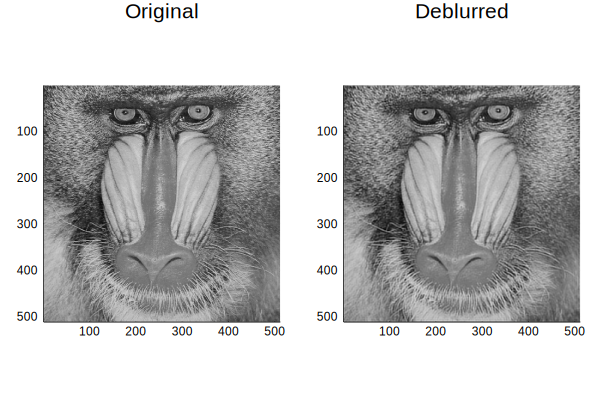

In [4]:
using Plots
plot(Gray.(X),layout=2,subplot=1,title="Original",aspect_ratio=1)
plot!(Gray.(Y),layout=2,subplot=2,title="Deblurred",aspect_ratio=1)

The reconstruction isn't perfect because the condition number of repeated blurring happens to be very large. 